In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math,copy
from sklearn import linear_model

In [2]:
#X represents the contains exam scores on two exams for a student
X_train =np.array([[34.62365962, 78.02469282],
 [30.28671077, 43.89499752],
 [35.84740877, 72.90219803],
 [60.18259939, 86.3085521 ],
 [79.03273605, 75.34437644]])
#y is the admition decision (0 for "No", 1 for "Yes").
y_train=np.array([0.,0.,0., 1., 1.])

In [57]:
print("shape osf X_train is : " + str(X_train.shape))
print("shape osf y_train is : " + str(y_train.shape))

shape osf X_train is : (5, 2)
shape osf y_train is : (5,)


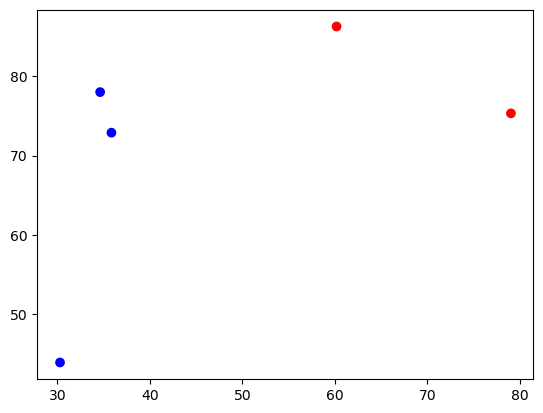

In [4]:
colors = np.array(['blue','blue','blue','red','red'])
plt.scatter(X_train[:,0],X_train[:,1], c= colors)

In [5]:
# for logistic function,the model is expressed as 
"""
 y_predict =  g(w.x + b)
 where the function g is sigmoid function defined as 
 g(z) = 1/(1+np.exp(-z))
 and w and b are parametres of the model
"""
# sigmoid function 

def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

In [7]:
# compute the cost for logistic regression

def compute_cost(x,y,w,b):
    m,n = x.shape
    cost = 0
    for i in range(m):
        z_i = np.dot(x[i],w )+ b
        f_wb_i = sigmoid(z_i)
        cost += -y[i]*np.log(f_wb_i)-(1-y[i])*np.log(1-f_wb_i)
    total_cost = cost / m 
    return total_cost

In [8]:
#gradient for logistic regression

def compute_gradient(x,y,w,b):
    m,n = x.shape
    dj_dw = np.zeros(n)
    dj_db = 0
    for i in range(m):
        z_wb = 0
        for j in range(n):
            z_wb += x[i,j] * w[j]
        z_wb += b
        f_wb =  sigmoid(z_wb)
        err_i = f_wb - y[i]
        dj_db_i = err_i
        dj_db += dj_db_i
        
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * x[i,j]
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw,dj_db

In [15]:
# gradient descent to optimize w and b which minimizes the cost with learning rate alpha 

def gradient_descent(x,y,w,b,cost_function,gradient_function,alpha,num_iters):
    m =x.shape[0]
    j_history = []
    w_history = []
    b_history = []
    for i in range(num_iters):
        dj_dw,dj_db = gradient_function(x,y,w,b)
        # update parameters
        w = w - alpha*dj_dw
        b = b - alpha*dj_db
        j_history.append(cost_function(x,y,w,b))
        w_history.append(w)
        b_history.append(b)
    return w,b,j_history,w_history,b_history

In [49]:
alpha = 0.06
iterations = 10000
w_in = np.array([0.,0.])
b_in = 0
w,b,j_history,w_history, b_history= gradient_descent(X_train,y_train,w_in,b_in,compute_cost,compute_gradient,alpha,iterations)

C:\Users\Hiwot\AppData\Local\Temp\ipykernel_11964\1652647944.py:9: RuntimeWarning: divide by zero encountered in log
  cost += -y[i]*np.log(f_wb_i)-(1-y[i])*np.log(1-f_wb_i)
C:\Users\Hiwot\AppData\Local\Temp\ipykernel_11964\1652647944.py:9: RuntimeWarning: invalid value encountered in scalar multiply
  cost += -y[i]*np.log(f_wb_i)-(1-y[i])*np.log(1-f_wb_i)


In [50]:
print(f"the parameter w is:, {w} and b is: {b}")

the parameter w is:, [ 22.79811717 -14.76424572] and b is: -38.93994609940567


In [51]:
z = np.dot(X_train,w) + b
y_predict = sigmoid(z)
y_predict = y_predict >=0.5
print(y_predict)

[False  True False  True  True]


In [56]:
x1 =np.array([74,34])
y_predi = sigmoid(np.dot(x1,w)+b)>=0.5
y_predi

True

In [59]:
#logistic regression with scikit learn module

logreg = linear_model.LogisticRegression()
logreg.fit(X_train,y_train)
y_predicted = logreg.predict(X_train)
y_predicted

array([0., 0., 0., 1., 1.])

In [77]:
x1 = np.array([[84,67]])
logreg.predict(x1)

array([1.])

In [69]:
x2 = np.array([[34,67]])
logreg.predict(x2)

array([0.])

In [75]:
x3 = np.array([[57,67]])
logreg.predict(x3)

array([1.])